In [4]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv("Churn_Modelling.csv")

In [6]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
#X = data.iloc[:,3:13].values

In [9]:
X = data.drop(columns = ["Exited",'RowNumber','CustomerId','Surname'])

In [10]:
X= pd.get_dummies(X, columns=['Geography','Gender'])

In [11]:
y = data["Exited"]

In [12]:
X.shape

(10000, 13)

In [ ]:
pip install tensorflow

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state =4)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)
#X_test = sc.transform(X_test)

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

# Learning Rates

In [1]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    #K.clear_session()

    ann = Sequential()

# Adding the input layer and the first hidden layer
    ann.add(Dense(units=13, activation='relu'))

# Adding the second hidden layer
    ann.add(Dense(units=4, activation='relu'))

# Adding the output layer
    ann.add(Dense(units=1, activation='softplus'))
    opt = tf.keras.optimizers.SGD(learning_rate=lr)
    ann.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    h = ann.fit(X_train, y_train, batch_size = 32, validation_data = (X_test,y_test), epochs = 10)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

NameError: name 'Sequential' is not defined

In [14]:
historydf = pd.concat(dflist, axis=1)

In [15]:
historydf

,loss,accuracy,val_loss,val_accuracy,loss,accuracy,val_loss,val_accuracy,loss,accuracy,val_loss,val_accuracy,loss,accuracy,val_loss,val_accuracy
0,12.091476,0.205125,12.180796,0.198,3.164042,0.794875,3.05414,0.802,3.188759,0.793250,3.084551,0.800,3.164041,0.794875,3.05414,0.802
1,12.091446,0.205125,12.180753,0.198,3.164042,0.794875,3.05414,0.802,3.188756,0.793250,3.084550,0.800,3.164041,0.794875,3.05414,0.802
2,12.091425,0.205125,12.180715,0.198,3.164042,0.794875,3.05414,0.802,3.188755,0.793250,3.084550,0.800,3.164042,0.794875,3.05414,0.802
3,12.091405,0.205125,12.180676,0.198,3.164041,0.794875,3.05414,0.802,3.188757,0.793250,3.084550,0.800,3.164041,0.794875,3.05414,0.802
4,12.091376,0.205125,12.180639,0.198,3.164042,0.794875,3.05414,0.802,3.188756,0.793250,3.084550,0.800,3.164043,0.794875,3.05414,0.802
5,12.091356,0.205125,12.180606,0.198,3.164041,0.794875,3.05414,0.802,3.188755,0.793250,3.084550,0.800,3.164040,0.794875,3.05414,0.802
6,12.091336,0.205125,12.180573,0.198,3.164042,0.794875,3.05414,0.802,3.188757,0.793250,3.084550,0.800,3.164042,0.794875,3.05414,0.802
7,12.091311,0.205125,12.180537,0.198,3.164042,0.794875,3.05414,0.802,3.188757,0.793250,3.084550,0.800,3.164043,0.794875,3.05414,0.802
8,12.091297,0.205125,12.180505,0.198,3.164042,0.794875,3.05414,0.802,3.188757,0.793250,3.084550,0.800,3.164042,0.794875,3.05414,0.802
9,12.091273,0.205125,12.180473,0.198,3.164042,0.794875,3.05414,0.802,3.181579,0.793625,3.054140,0.802,3.164042,0.794875,3.05414,0.802


In [16]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

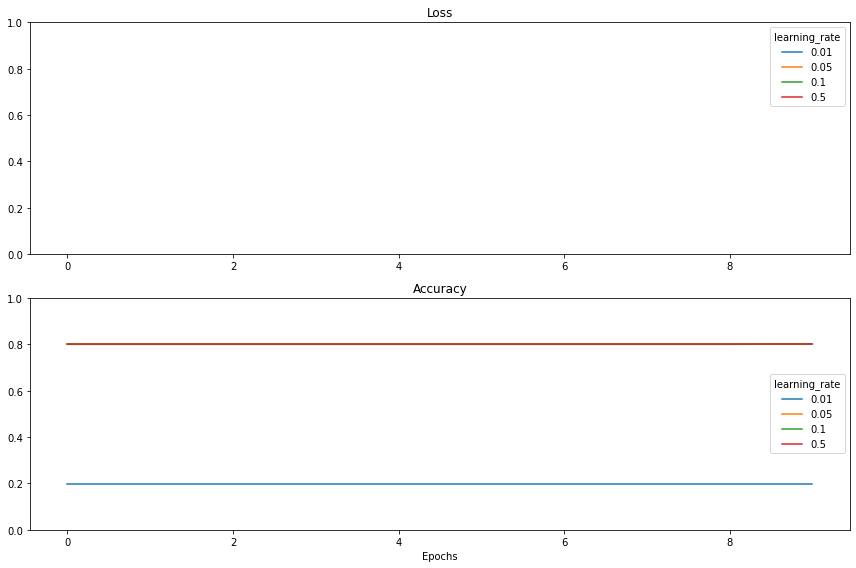

In [17]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('val_loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('val_accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

# Batch Sizes

In [18]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    #K.clear_session()

    
    ann = Sequential()

# Adding the input layer and the first hidden layer
    ann.add(Dense(units=13, activation='relu'))

# Adding the second hidden layer
    ann.add(Dense(units=6, activation='relu'))

# Adding the output layer
    ann.add(Dense(units=1, activation='softplus'))
    opt = tf.keras.optimizers.SGD()
    ann.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    h = ann.fit(X_train, y_train, batch_size = batch_size, validation_data = (X_test,y_test), epochs = 10)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

Epoch 1/10
500/500 [==============================] - 1s 825us/step - loss: 12.1213 - accuracy: 0.2051 - val_loss: 12.2299 - val_accuracy: 0.1980
Epoch 2/10
500/500 [==============================] - 0s 705us/step - loss: 12.1213 - accuracy: 0.2051 - val_loss: 12.2299 - val_accuracy: 0.1980
Epoch 3/10
500/500 [==============================] - 0s 763us/step - loss: 12.1213 - accuracy: 0.2051 - val_loss: 12.2299 - val_accuracy: 0.1980
Epoch 4/10
500/500 [==============================] - 0s 700us/step - loss: 12.1213 - accuracy: 0.2051 - val_loss: 12.2299 - val_accuracy: 0.1980
Epoch 5/10
500/500 [==============================] - 0s 694us/step - loss: 12.1213 - accuracy: 0.2051 - val_loss: 12.2299 - val_accuracy: 0.1980
Epoch 6/10
500/500 [==============================] - 0s 705us/step - loss: 12.1213 - accuracy: 0.2051 - val_loss: 12.2299 - val_accuracy: 0.1980
Epoch 7/10
500/500 [==============================] - 0s 702us/step - loss: 12.1213 - accuracy: 0.2051 - val_loss: 12.2299 -

In [19]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

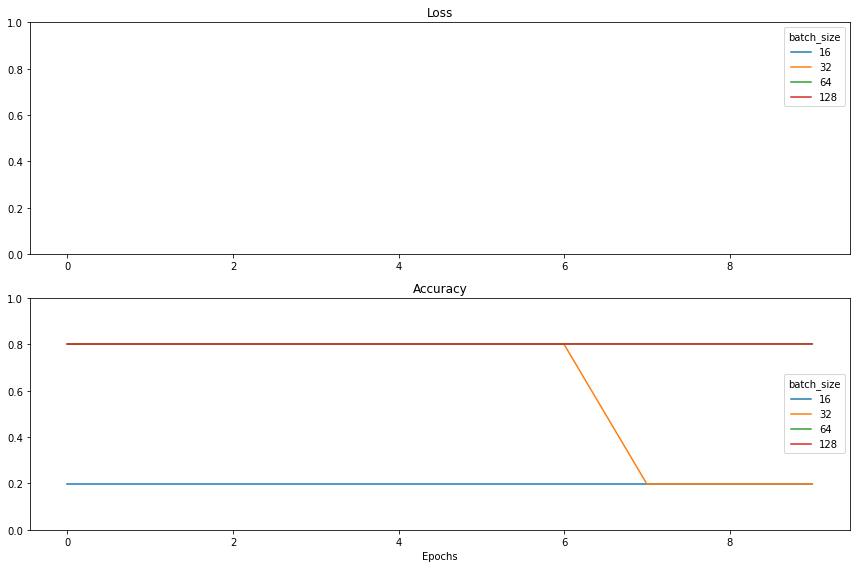

In [20]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('val_loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('val_accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

# Optimizers

In [21]:
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [22]:
dflist = []

optimizers = ['SGD(learning_rate=0.01)',
              'SGD(learning_rate=0.01, momentum=0.3)',
              'SGD(learning_rate=0.01, momentum=0.3, nesterov=True)',  
              'Adam(learning_rate=0.01)',
              'Adagrad(learning_rate=0.01)',
              'RMSprop(learning_rate=0.01)']

for opt_name in optimizers:

    ann = Sequential()

# Adding the input layer and the first hidden layer
    ann.add(Dense(units=13, activation='relu'))

# Adding the second hidden layer
    ann.add(Dense(units=6, activation='relu'))

# Adding the output layer
    ann.add(Dense(units=1, activation='softplus'))
    opt = tf.keras.optimizers.SGD()
    ann.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = ann.fit(X_train, y_train, batch_size = batch_size, validation_data = (X_test,y_test), epochs = 10)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

Epoch 1/10
63/63 [==============================] - 0s 2ms/step - loss: 12.0770 - accuracy: 0.2080 - val_loss: 12.2299 - val_accuracy: 0.1980
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 12.1212 - accuracy: 0.2051 - val_loss: 12.2299 - val_accuracy: 0.1980
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 12.1212 - accuracy: 0.2051 - val_loss: 12.2299 - val_accuracy: 0.1980
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 12.1212 - accuracy: 0.2051 - val_loss: 12.2299 - val_accuracy: 0.1980
Epoch 5/10
63/63 [==============================] - 0s 1ms/step - loss: 12.1212 - accuracy: 0.2051 - val_loss: 12.2299 - val_accuracy: 0.1980
Epoch 6/10
63/63 [==============================] - 0s 2ms/step - loss: 12.1212 - accuracy: 0.2051 - val_loss: 12.2299 - val_accuracy: 0.1980
Epoch 7/10
63/63 [==============================] - 0s 1ms/step - loss: 12.1212 - accuracy: 0.2051 - val_loss: 12.2299 - val_accuracy: 0.1980
Epoch 

Epoch 9/10
63/63 [==============================] - 0s 1ms/step - loss: 6.7016 - accuracy: 0.5616 - val_loss: 6.9254 - val_accuracy: 0.5470
Epoch 10/10
63/63 [==============================] - 0s 1ms/step - loss: 6.7016 - accuracy: 0.5616 - val_loss: 6.9254 - val_accuracy: 0.5470


In [23]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

Text(0.5, 0, 'Epochs')

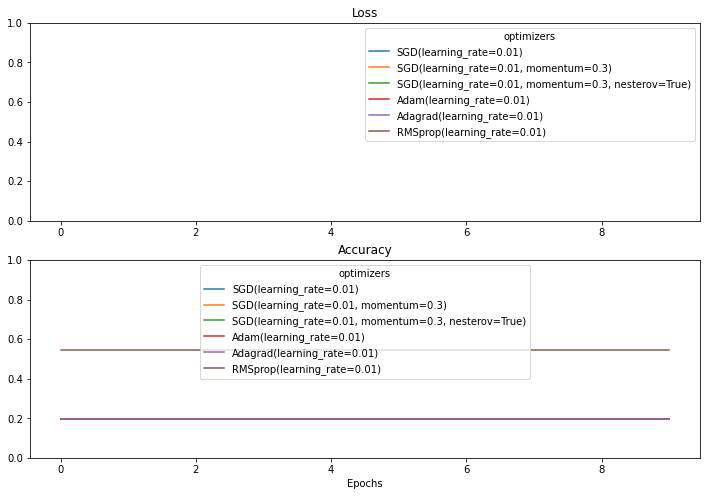

In [24]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('val_loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('val_accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")


In [25]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    ann = Sequential()

# Adding the input layer and the first hidden layer
    ann.add(Dense(units=13,kernel_initializer=init, activation='relu'))

# Adding the second hidden layer
    ann.add(Dense(units=6, kernel_initializer=init, activation='relu'))

# Adding the output layer
    ann.add(Dense(units=1, kernel_initializer=init, activation='softplus'))
    opt = tf.keras.optimizers.SGD()
    ann.compile(loss='binary_crossentropy',
                  optimizer=SGD(),
                  metrics=['accuracy'])
    h = ann.fit(X_train, y_train, batch_size = batch_size, validation_data = (X_test,y_test), epochs = 10)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

Epoch 1/10
63/63 [==============================] - 0s 5ms/step - loss: 0.8082 - accuracy: 0.2104 - val_loss: 0.6905 - val_accuracy: 0.8020
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.6426 - accuracy: 0.7949 - val_loss: 0.6031 - val_accuracy: 0.8020
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 0.5845 - accuracy: 0.7949 - val_loss: 0.5628 - val_accuracy: 0.8020
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 0.5556 - accuracy: 0.7949 - val_loss: 0.5407 - val_accuracy: 0.8020
Epoch 5/10
63/63 [==============================] - 0s 1ms/step - loss: 0.5391 - accuracy: 0.7949 - val_loss: 0.5272 - val_accuracy: 0.8020
Epoch 6/10
63/63 [==============================] - 0s 1ms/step - loss: 0.5289 - accuracy: 0.7949 - val_loss: 0.5187 - val_accuracy: 0.8020
Epoch 7/10
63/63 [==============================] - 0s 1ms/step - loss: 0.5224 - accuracy: 0.7949 - val_loss: 0.5129 - val_accuracy: 0.8020
Epoch 8/10
63/63 [==

In [26]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

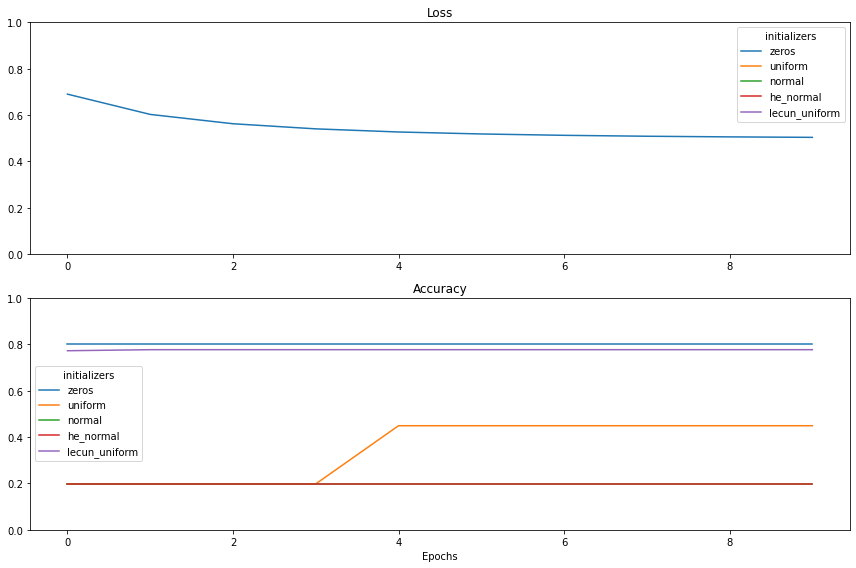

In [27]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('val_loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('val_accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()